In [3]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Angle determination on a photo

In [1]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def find_angle(image,n,gap,verbose=False):
    angles_f =[]
    img_before = cv2.imread(image)
    scale_percent = 30 # percent of original size
    width = int(img_before.shape[1] * scale_percent / 100)
    height = int(img_before.shape[0] * scale_percent / 100)
    dim = (width, height)
    img_before = cv2.resize(img_before, dim, interpolation = cv2.INTER_AREA)
    img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5,5), 0)
    cv2.imwrite('edge/{n}/blur.jpg'.format(n=n),img_gray)
    
    tresh = np.linspace(150,200,(200-150)+1)
    tresholds = []
    for i in tresh:
        tresholds.append((i//3,i))
        
        
    for treshold in tresholds:
        
        img_edges = cv2.Canny(img_gray, treshold[0], treshold[1])
        if verbose:
            cv2.imwrite('edge/{n}/edge/edge_{t1}_{t2}.jpg'.format(n=n,t1 = treshold[0],t2 =treshold[1] ), img_edges)  
        lines = cv2.HoughLinesP(img_edges, 1, np.pi/180.0, 100, minLineLength=50, maxLineGap=gap)
        angles = []
        
        try:
            for [[x1, y1, x2, y2]] in lines:
                cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
                angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
                angles.append(angle)
        except Exception as e:
            continue
        
        if verbose:
            cv2.imwrite('edge/{n}/line/line_{t1}_{t2}.jpg'.format(n=n,t1 = treshold[0],t2 =treshold[1] ), img_before)

        median_angle = np.median(angles)
        angles_f.append(median_angle)
    return angles_f

def final_angles(angles):
    angles_neg=[]
    angles_pos=[]
    neg = 0
    pos = 0
    if len(angles)==0:
        print('No Angles found')
        return -1000
    for angle in angles:
        
        if angle < 0:
            neg+= 1
            angles_neg.append(angle)
        else:
            pos += 1
            angles_pos.append(angle)
    if neg> pos:
        median =np.median(angles_neg)
        for i in angles_neg:
            if np.abs(i-median)>3:
                angles_neg.remove(i)      
        median = np.median(angles_neg)
        if abs(median) > 45:
            median = (90+median)
    else:
        median = np.median(angles_pos)
        for i in angles_pos:
            if np.abs(i-median)>3:
                angles_pos.remove(i)
        median = np.mean(angles_pos)
        if abs(median) > 45:
            median = -(90-median)
    return median
def compute_angle(n,gap=5,verbose=False):
    image = 'edge/{n}/{n}.jpg'.format(n=n)
    angles=find_angle(image,n,gap,verbose)
    final_angle = final_angles(angles)
    if final_angle != -1000:
        img_rotated = rotate_image(cv2.imread(image), final_angle)
        cv2.imwrite('edge/{n}/rotated.jpg'.format(n=n), img_rotated) 
    else:
        img_rotated = cv2.imread(image)
        cv2.imwrite('edge/{n}/rotated.jpg'.format(n=n), img_rotated)
    if verbose:
        img_base = mpimg.imread('edge/{n}/{n}.jpg'.format(n=n))
        img = mpimg.imread('edge/{n}/rotated.jpg'.format(n=n))
        fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
        fig.suptitle('Rotate the image')
        axs[0].imshow(img_base)
        axs[1].imshow(img)
        axs[0].axis('off')
        axs[1].axis('off')
                   
    return final_angle

36.29262972847959

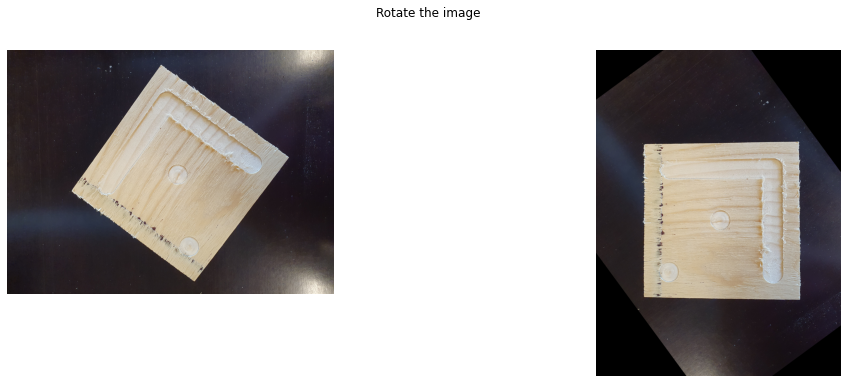

In [4]:
compute_angle(5,gap=5,verbose=True)

In [244]:
#35.32,35.8 6
compute_angles=[[],[],[]]
gap = np.linspace(1,10,10)
for i in range(1,9):
    compute_angles[0].append(i)
    for g in gap:
        compute_angles[1].append(g)
        compute_angles[2].append(compute_angle(i,g))
compute_angles


No Angles found
No Angles found
No Angles found
No Angles found
No Angles found
No Angles found
No Angles found
No Angles found
No Angles found
No Angles found


[[1, 2, 3, 4, 5, 6, 7, 8],
 [1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0],
 [-14.280740657464788,
  -14.307047682195858,
  -13.191620668911224,
  -32.80013210041898,
  -30.46074473466144,
  -29.62373384087637,
  -31.9125623192429,
  -31.889967808357618,
  -30.89135481711991,
  -30.900413492656035,
  -1000,
  -1000,
  -1000,
  -1000,
  -1000,
  -1000,
  -1000,
  -1000,
  -1000,
  -1000,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

# Live 


In [5]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")
import numpy as np
import math
import cv2

cap = cv2.VideoCapture(0)
t_high = 100
while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(gray,t_high/3, t_high) #standard 30 100q
    cv2.imshow("edges", edges)
    cv2.imshow("gray", gray)
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()